# Importing Required Libraries

In [18]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from torch.optim import Adam
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error

# Preparing the dataset

In [19]:
# Prepare data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#raw_df = raw_df.dropna()

#print(raw_df)
# Only the feature 5 is selected for regression task
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
X = []
for i in range(len(x)):
  X.append(x[i][5])
X = np.array(X)
y = raw_df.values[1::2, 2]  
print(X,y)
#X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
n_samples,n_features = len(X),1 
print(len(X),len(y))
print(n_samples,n_features)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

# Converting the data into tensors

In [20]:
X_d = torch.from_numpy(X).float()
X_d = X_d.view(X_d.shape[0], 1)
y_d = torch.from_numpy(y.astype(np.float32))
y_d = y_d.view(y_d.shape[0], 1)

print(X_d,y_d)

tensor([[6.5750],
        [6.4210],
        [7.1850],
        [6.9980],
        [7.1470],
        [6.4300],
        [6.0120],
        [6.1720],
        [5.6310],
        [6.0040],
        [6.3770],
        [6.0090],
        [5.8890],
        [5.9490],
        [6.0960],
        [5.8340],
        [5.9350],
        [5.9900],
        [5.4560],
        [5.7270],
        [5.5700],
        [5.9650],
        [6.1420],
        [5.8130],
        [5.9240],
        [5.5990],
        [5.8130],
        [6.0470],
        [6.4950],
        [6.6740],
        [5.7130],
        [6.0720],
        [5.9500],
        [5.7010],
        [6.0960],
        [5.9330],
        [5.8410],
        [5.8500],
        [5.9660],
        [6.5950],
        [7.0240],
        [6.7700],
        [6.1690],
        [6.2110],
        [6.0690],
        [5.6820],
        [5.7860],
        [6.0300],
        [5.3990],
        [5.6020],
        [5.9630],
        [6.1150],
        [6.5110],
        [5.9980],
        [5.8880],
        [7

# Deining the model for neural network

In [21]:
# Model defination
class LinearRegressionModel(torch.nn.Module):
    # Initializing the parameters only one layer is used for regression task
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.fc1 = nn.Linear(1, 1)

    # Providing the Layer as output
    def forward(self, x):
        return self.fc1(x)

# Creating model object.
model = LinearRegressionModel()
print(model)
# Defining the Loss and optimizer
learning_rate = 0.01
# MSE loss is used and SGD is used as optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

LinearRegressionModel(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)


# Running the epochs and calculating the errror

In [22]:

# Implementing the Training loop
num_epochs = 1000
ep = []
lo = []
# Two iterations
i = 0
while i<2:
  for epoch in range(num_epochs):
      # Forward pass and loss
      y_predicted = model(X_d)
      loss = criterion(y_predicted, y_d)
      
      # Backward pass and update
      loss.backward()
      optimizer.step()

      # zero grad before new step
      optimizer.zero_grad()

      if (epoch+1) % 10 == 0:
          print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
          ep.append(epoch+1)
          lo.append(loss)
      i = i + 1
print(ep,loss.item())

epoch: 10, loss = 58.8716
epoch: 20, loss = 58.7983
epoch: 30, loss = 58.7254
epoch: 40, loss = 58.6528
epoch: 50, loss = 58.5806
epoch: 60, loss = 58.5087
epoch: 70, loss = 58.4372
epoch: 80, loss = 58.3660
epoch: 90, loss = 58.2951
epoch: 100, loss = 58.2246
epoch: 110, loss = 58.1544
epoch: 120, loss = 58.0846
epoch: 130, loss = 58.0151
epoch: 140, loss = 57.9459
epoch: 150, loss = 57.8771
epoch: 160, loss = 57.8086
epoch: 170, loss = 57.7404
epoch: 180, loss = 57.6726
epoch: 190, loss = 57.6050
epoch: 200, loss = 57.5378
epoch: 210, loss = 57.4710
epoch: 220, loss = 57.4044
epoch: 230, loss = 57.3382
epoch: 240, loss = 57.2722
epoch: 250, loss = 57.2066
epoch: 260, loss = 57.1413
epoch: 270, loss = 57.0764
epoch: 280, loss = 57.0117
epoch: 290, loss = 56.9474
epoch: 300, loss = 56.8833
epoch: 310, loss = 56.8196
epoch: 320, loss = 56.7561
epoch: 330, loss = 56.6930
epoch: 340, loss = 56.6302
epoch: 350, loss = 56.5677
epoch: 360, loss = 56.5055
epoch: 370, loss = 56.4435
epoch: 380

# Plotting the number of epochs and Loss

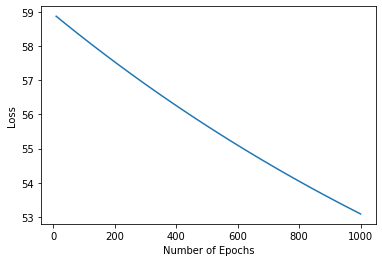

In [23]:
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.plot(ep, lo)

# Plotting the prediction and the traing data

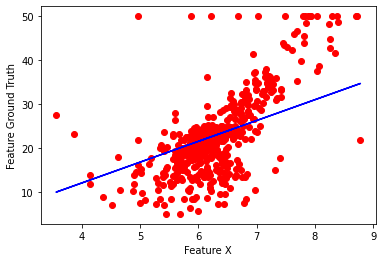

In [24]:
# Plot
predicted = model(X_d).detach().numpy()
x_n = X_d.numpy()
y_n = y_d.numpy()
#print(predicted,y_n)
#print(predicted.shape,x_n.shape)
plt.xlabel("Feature X")
plt.ylabel("Feature Ground Truth")
plt.plot(x_n, y_n, 'ro')
plt.plot(x_n, predicted, 'b')
plt.show()

# Calculating the RSME For regression task

In [25]:
error = mean_squared_error(predicted,y_n,squared=False)
print("Error in regression is: ",error)

Error in regression is:  7.2857056
